### Q 1
### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

#### Given, Significance level, $\alpha$ = 0.05

#### To find whether there is any significant difference in the diameter of the cutlet between two units,
#### find the mean of two units $𝜇_{1}$ and $𝜇_{2}$ 

### Null Hypothesis $H_{o}$ , $𝜇_{1}$ = $𝜇_{2}$
### Alternate Hypothesis $H_{A}$ , $𝜇_{1}$ $\neq$ $𝜇_{2}$

#### If p value < $\alpha$ , Reject Null Hypothesis
#### If p value > $\alpha$ , Fail to reject Null Hypothesis

### Since there are two independent samples we do Two Sample t test here



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

In [2]:
cutlet = pd.read_csv('Cutlets.csv')
cutlet

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


#### For the Two sample t test to be conducted data has to be normally distributed
#### and have similar variances (homogeneity assumption).

### Checking for normality with Q-Q plot

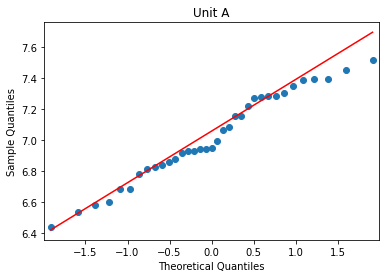

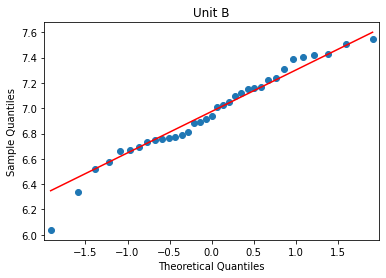

In [3]:
sm.qqplot(cutlet["Unit A"], line='q')
plt.title('Unit A');
sm.qqplot(cutlet["Unit B"], line='q')
plt.title('Unit B');

#### The data looks very much normal.

### Check for Similar Variances

In [4]:
a=cutlet['Unit A'].var()
a

0.08317945374789915

In [5]:
b=cutlet['Unit B'].var()
b

0.11792400440336127

In [ ]:
# if the ratio of larger data group to smaller one is < 4:1 we consider equal variance
if (b/a < 4/1):
    print('The data groups have equal variance')
else:
    print('Not equal')

The data groups have equal variance


### Two Sample t Test

In [7]:
stats.ttest_ind(cutlet['Unit A'],cutlet['Unit B'])

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

### Since p value = 0.47 > 0.05  we fail to reject null hypothesis.
#### So we conclude there is no significant difference in diameter between cutlet of two units A and B.

### Q 2
### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [8]:
labtat=pd.read_csv('LabTAT.csv')
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


#### Null Hypothesis $H_{o}$ --> There is no difference in avg TAT among diff laboratories
#### Alternate Hypothesis $H_{A}$ --> There is difference in avg TAT among diff laboratories

#### When mean of more than two samples needs to be compared we use
### One-Way ANOVA Test

In [9]:
stats.f_oneway(labtat['Laboratory 1'],labtat['Laboratory 2'],labtat['Laboratory 3'],labtat['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

### Since p value = 2.11 > 0.05 we fail to reject null hypothesis
#### So we conclude there is no difference in average TAT among different laboratories.

### Q 3

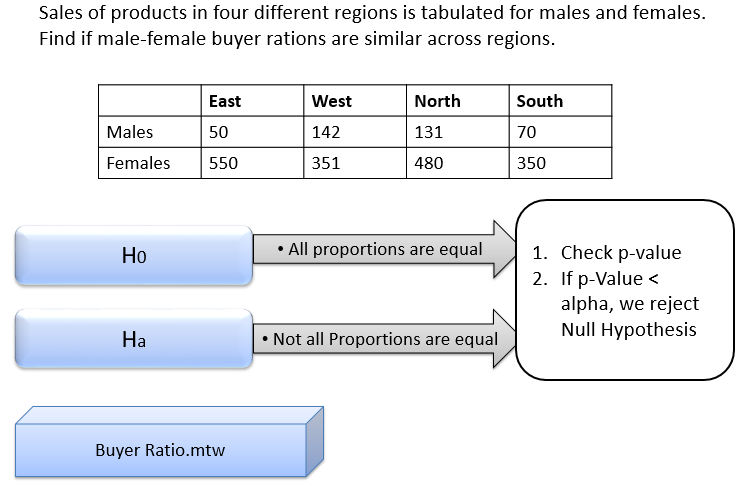

In [10]:
from PIL import ImageGrab
ImageGrab.grabclipboard()

In [11]:
sales=pd.read_csv('BuyerRatio.csv')
sales

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


### Pearson's Chi Square Test

In [12]:
statistic, p, df, expected_values = stats.chi2_contingency(sales.iloc[:,1:])
print('pvalue=',p)
alpha = 0.05
if p > alpha:
    print('we Fail to Reject Null Hypothesis')
else:
    print('Reject Null Hypothesis')

pvalue= 0.6603094907091882
we Fail to Reject Null Hypothesis


#### Hence we conclude All proportions are equal.

### Q 4

### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

In [13]:
cust = pd.read_csv('Costomer+OrderForm.csv')
cust

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


#### Null Hypothesis  $H_{o}$  -->  Defective % does not vary by centre
#### Alternate Hypothesis  $H_{A}$  -->  Defective % varies by centre

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
categ = ['Phillippines','Indonesia','Malta','India']
cust[categ] = cust[categ].apply(label_encoder.fit_transform)
cust

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,0,1
298,1,1,1,1


### Cochran's Q test

In [17]:
import statsmodels
test = statsmodels.stats.contingency_tables.cochrans_q(cust,return_object=True)
print(test)

df          3
pvalue      0.26836143314257704
statistic   3.9368770764119603


#### Since p value 0.268 > 0.05 we fail to reject null hypothesis.
#### Hence we conclude defective % does not vary by centre.